### Overview of the scenario

As the year-end holiday school is coming soon. Which is a good time to reward students in the class for their effort of studying, achieving good grades, participation of the classes, and their cooperation with the teacher. Rewarding them might be able to motivate them to put more effort in studying and hardworking. The scenario involves a kindergarten teacher who wants to reward all 25 students in her class with an amazing holiday set by November 2023. There are 25 students in the class consisting of 15 girls and 10 boys. The teacher has a budget of RM 200.00 for all the holiday sets. Each holiday set should be wrapped using a blue wrapper for boys and a pink wrapper for girls, costing RM 1.00 each. Each holiday set should contain at least two stationery items.

Import libraries needed

In [1]:
import random
import matplotlib.pyplot as plt

Variable Declaration

In [2]:
#The first 4 items are stationary

items = [
    "Mini sketch book",
    "2B pencil",
    "Color pencil",
    "Magic pen",
    "Potato chip",
    "Milo packet",
    "Chipsmore Biscuit",
    "Milk biscuit"
]

Price = [2, 1, 3, 3, 2, 1, 2, 3]

List_Num = len(Price)
Total_Set = 25
Wrapper = 1 * Total_Set
Budget = 200 - Wrapper
Maxprice_Set = Budget / Total_Set
Generation=100

Function to generate item set

In [3]:
def sets():
    stationary = random.sample(range(4),2)
    stationary_price = sum(Price[i] for i in stationary)
    remaining_budget = Maxprice_Set - stationary_price
    other_items = [i for i in range(len(items)) if i not in stationary]

    random.shuffle(other_items)
    selected_items = []
    selected_price = 0

    for item in other_items:
        item_price = Price[item]
        if selected_price + item_price <= remaining_budget:

            selected_items.append(item)
            selected_price += item_price
            if selected_price + item_price >= remaining_budget:
                break

    sets_item = [items[i] for i in stationary]
    sets_item.extend([items[i] for i in selected_items])

    return sets_item

The collection of all sets

In [4]:
def population():
    return [sets() for _ in range(Total_Set)]

Function to calculate price and fitness of each set

In [5]:
def calculate_price(item_set):
    return sum(Price[items.index(item)] for item in item_set)

# The higher the fitness value, the lower the price of the item set
def calculate_set_fitness(item_set):
    unique_items = set(item_set)
    if len(unique_items) >= 3:
        budget_to_total_price_ratio = Budget/calculate_price(item_set)
        return budget_to_total_price_ratio
    return 0

Selection Methods

In [6]:
def roulette_wheel_selection(population):
    fitness_scores = [calculate_set_fitness(item_set) for item_set in population]
    total_fitness = sum(fitness_scores)
    probabilities = [score / total_fitness for score in fitness_scores]
    return random.choices(population, probabilities, k=2)


def tournament_selection(population):
    k = 5
    selected_parents = random.choices(population, k=k)
    selected_parents.sort(key=lambda x: calculate_set_fitness(x), reverse=True)
    return selected_parents[:2]

Crossover Methods

In [7]:
def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def uniform_crossover(parent1, parent2):
    child1 = []
    child2 = []
    min_length = min(len(parent1), len(parent2))

    for i in range(min_length):
        if random.random() < 0.5:
            child1.append(parent1[i])
            child2.append(parent2[i])
        else:
            child1.append(parent2[i])
            child2.append(parent1[i])

    if len(parent1) > len(parent2):
        child1.extend(parent1[min_length:])
    else:
        child2.extend(parent2[min_length:])

    return child1, child2


Mutation Methods

In [8]:
def swap_mutation(item_set, mutation_rate):
    mutated_set = item_set[:]
    for i in range(len(item_set)):
        if random.random() < mutation_rate:
            available_items = [item for item in items if item not in mutated_set]
            if available_items and len(mutated_set) > i:
                mutated_set[i] = random.choice(available_items)
    return mutated_set


def random_reset_mutation(item_set, mutation_rate):
    mutated_set = item_set[:]
    non_stationary_items = item_set[2:]  # Exclude the first 2 stationary items
    for i in range(len(non_stationary_items)):
        if random.random() < mutation_rate:
            mutated_set[i] = random.choice(non_stationary_items)
    return mutated_set

Genetic Algorithm Function

In [9]:
def genetic_algo(population, mutation_rate, selection_method, crossover_method, mutation_method):
    new_population = []
    fitness_history = []

    while len(new_population) < Total_Set:
        if selection_method == "roulette_wheel":
            parent1, parent2 = roulette_wheel_selection(population)
        elif selection_method == "tournament":
            parent1, parent2 = tournament_selection(population)

        child1 = []
        child2 = []

        if crossover_method == "single_point":
            child1, child2 = single_point_crossover(parent1, parent2)
        elif crossover_method == "uniform":
            child1, child2 = uniform_crossover(parent1, parent2)

        mutated_child1 = mutation_method(child1, mutation_rate)
        mutated_child2 = mutation_method(child2, mutation_rate)
        new_population.extend([mutated_child1, mutated_child2])

    return new_population[:Total_Set]

Main function

In [10]:
def main():

    all_sets = population()

    selection_methods = ["roulette_wheel", "tournament"]
    crossover_methods = ["single_point", "uniform"]
    mutation_methods = [swap_mutation, random_reset_mutation]

    best_price = float('inf')
    best_item_set = []
    best_selection = ""
    best_crossover = ""
    best_mutation = ""

    for selection_method in selection_methods:
        for crossover_method in crossover_methods:
            for mutation_method in mutation_methods:
                allsets= genetic_algo(all_sets, 0.01, selection_method, crossover_method, mutation_method)

                total_price = 0
                # Calculate total price
                for item_set in allsets:
                    price = calculate_price(item_set)
                    total_price += price

                # Update best item set if current combination is more efficient
                if total_price < best_price:
                    best_price = total_price
                    best_item_set = allsets
                    best_selection = selection_method
                    best_crossover = crossover_method
                    best_mutation = mutation_method.__name__

    print("Best Combination:")
    print(f"Selection: {best_selection}, Crossover: {best_crossover}, Mutation: {best_mutation}")
    print()
    print("Holiday Sets:")
    for i, item_set in enumerate(best_item_set):
        total_items = len(item_set)
        total_set_price = calculate_price(item_set)
        if i < 10:
            print(f"Student {i + 1} - Boy Holiday Set with Blue Wrapper:")
        else:
            print(f"Student {i + 1} - Girl Holiday Set with Pink Wrapper:")
        print("Items:", item_set)
        print("Total Combination of Items:", total_items)
        print("Total Price: RM", total_set_price)
        print()
    print("Total Price of Best Combination: RM", best_price)

if __name__ == '__main__':
    main()

Best Combination:
Selection: tournament, Crossover: single_point, Mutation: swap_mutation

Holiday Sets:
Student 1 - Boy Holiday Set with Blue Wrapper:
Items: ['Mini sketch book', 'Color pencil', 'Potato chip']
Total Combination of Items: 3
Total Price: RM 7

Student 2 - Boy Holiday Set with Blue Wrapper:
Items: ['Mini sketch book', 'Color pencil', 'Milo packet']
Total Combination of Items: 3
Total Price: RM 6

Student 3 - Boy Holiday Set with Blue Wrapper:
Items: ['Mini sketch book', '2B pencil', 'Milo packet']
Total Combination of Items: 3
Total Price: RM 4

Student 4 - Boy Holiday Set with Blue Wrapper:
Items: ['Mini sketch book', 'Color pencil', 'Milk biscuit']
Total Combination of Items: 3
Total Price: RM 8

Student 5 - Boy Holiday Set with Blue Wrapper:
Items: ['Magic pen', 'Color pencil', 'Chipsmore Biscuit']
Total Combination of Items: 3
Total Price: RM 8

Student 6 - Boy Holiday Set with Blue Wrapper:
Items: ['2B pencil', '2B pencil', 'Chipsmore Biscuit']
Total Combination of 

Function to calculate average fitness of each sets generated

In [11]:
def grade(population):
    return sum(calculate_set_fitness(item_set) for item_set in population) / len(population)

Graphs of Comparison of Selection Methods, Crossover Methods and Mutation Methods

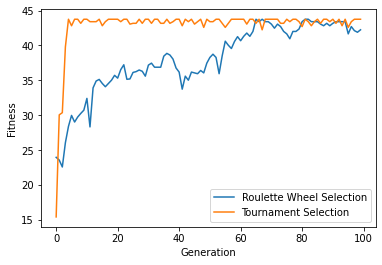

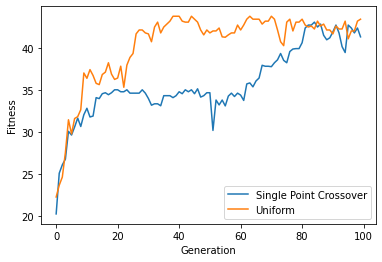

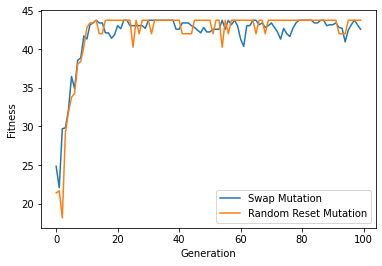

In [12]:
def fitness_his(selection_method, crossover_method, mutation_method):
    itemsets = population()
    fitness_history = []
    for _ in range(Generation):
        itemsets = genetic_algo(itemsets, 0.01, selection_method, crossover_method, mutation_method)
        fitness = grade(itemsets)
        fitness_history.append(fitness)
    return fitness_history

# Calculate fitness history for each combination
fitness_roulette = fitness_his("roulette_wheel", "single_point", swap_mutation)
fitness_tournament = fitness_his("tournament", "single_point", swap_mutation)
fitness_singepoint = fitness_his("roulette_wheel", "single_point", swap_mutation)
fitness_uniform = fitness_his("roulette_wheel", "uniform", swap_mutation)
fitness_swap = fitness_his("roulette_wheel", "single_point", swap_mutation)
fitness_randomreset = fitness_his("roulette_wheel", "single_point", random_reset_mutation)

# Plotting the fitness history for each combination of selection method
plt.plot(range(Generation), fitness_roulette, label="Roulette Wheel Selection")
plt.plot(range(Generation), fitness_tournament, label="Tournament Selection")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()

# Plotting the fitness history for each combination of crossover method
plt.plot(range(Generation), fitness_singepoint, label="Single Point Crossover")
plt.plot(range(Generation), fitness_uniform, label="Uniform")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()

# Plotting the fitness history for each combination of mutation method
plt.plot(range(Generation), fitness_swap, label="Swap Mutation")
plt.plot(range(Generation), fitness_randomreset, label="Random Reset Mutation")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()
